In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from scipy.stats import f
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D


sns.set()

In [ ]:
# load datasets

train_df_complete = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df_complete = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

In [ ]:
# remove the first 'unnamed' column

train_df_complete = train_df_complete.iloc[:,1:]
test_df_complete = test_df_complete.iloc[:,1:]

In [ ]:
# @title
# rename stuff according to this paper: https://www.sciencedirect.com/science/article/pii/S0098135414000969?via%3Dihub
'''
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

train_df_complete = train_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df_complete = test_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
'''

In [ ]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df_complete = train_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df_complete = test_df_complete.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [ ]:
# prepare dataset
# only use simulation run 1 for training and testing
# only use fault type 1 for now
# CAN BE CHANGED LATER

train_df = train_df_complete[train_df_complete.simulationRun==1].iloc[:,3:]
test_df = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==1)].iloc[:,3:]


In [ ]:
test_df.reset_index(drop=True, inplace=True)
    # resets the index so that the dataframe start from 0, not some other weird number
    # this fixes the issue where the faulty dataframe would appear shifted far rightward
test_df

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.74559,3647.8,4496.2,8.9127,26.599,42.246,2707.2,74.762,120.40,0.30357,...,54.033,72.805,55.919,22.553,36.582,33.413,45.081,59.867,40.954,16.382
496,0.73589,3658.5,4520.1,8.7830,26.871,42.367,2703.9,75.263,120.40,0.33425,...,53.916,72.091,56.887,22.284,40.616,37.943,42.518,59.935,41.230,17.373
497,0.73200,3651.9,4483.7,8.7352,26.919,42.468,2699.8,75.084,120.39,0.33825,...,54.353,72.473,58.412,21.659,40.128,40.946,46.667,59.835,41.161,18.255
498,0.74578,3627.7,4510.9,8.8276,26.955,42.249,2701.2,75.042,120.37,0.32027,...,54.405,72.880,59.465,22.658,37.214,37.825,47.355,59.927,40.436,19.142


In [ ]:
# generate control charts for all features
# plot the mean, upper limit and lower limit


fig, ax = plt.subplots(13,4, figsize=(30,90))

for i in range(train_df.shape[1]):

    x = train_df.iloc[:,i]
    mean = x.mean()
    std = x.std(ddof=1)

    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    x.plot(ax=ax.ravel()[i])

    ax.ravel()[i].axhline(mean, c='k')
    ax.ravel()[i].axhline(lowerlim, ls='--', c='r')
    ax.ravel()[i].axhline(upperlim, ls='--', c='r')
    ax.ravel()[i].set_title(train_df.columns[i])


Text(0, 0.5, 'Value')

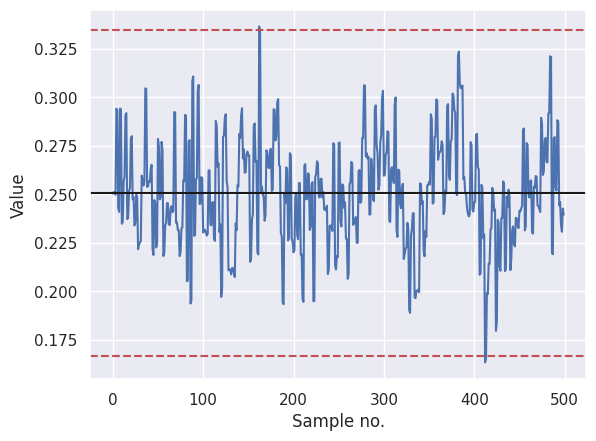

In [ ]:
just_plot_this = train_df.iloc[:,0]
mean = just_plot_this.mean()
std = just_plot_this.std()

lowerlim = mean - 3*std
upperlim = mean + 3*std

plt.plot(just_plot_this)
plt.axhline(y=mean, c='k')
plt.axhline(y=lowerlim, ls='--', c='r')
plt.axhline(y=upperlim, ls='--', c='r')

plt.xlabel('Sample no.')
plt.ylabel('Value')

In [ ]:
just_plot_this

0      0.25038
1      0.25109
2      0.25038
3      0.24977
4      0.29405
        ...   
495    0.24602
496    0.23457
497    0.23068
498    0.24263
499    0.23958
Name: xmeas_1, Length: 500, dtype: float64

In [ ]:
# visualize fault type 1 effects

fig, ax = plt.subplots(13,4, figsize=(30,90))

for i in range(train_df.shape[1]):

    x_faultfree = train_df.iloc[:,i]
    x_faulty = test_df.iloc[:,i]
    mean = x_faultfree.mean()
    std = x_faultfree.std(ddof=1)

    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    x_faultfree.plot(ax=ax.ravel()[i], alpha=0.5, label='fault-free')
    x_faulty.plot(ax=ax.ravel()[i], label='faulty', c='r')

    ax.ravel()[i].axhline(mean, c='k')
    ax.ravel()[i].axhline(lowerlim, ls='--', c='r')
    ax.ravel()[i].axhline(upperlim, ls='--', c='r')
    ax.ravel()[i].axvline(20, ls='--', c='g')
    ax.ravel()[i].set_title(train_df.columns[i])
    ax.ravel()[i].legend()


In [ ]:
faultnum = 18
test_df = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==faultnum)].iloc[:,3:]
test_df.reset_index(drop=True, inplace=True)

In [ ]:
row_labels = train_df.columns.tolist()
sample_count = train_df.shape[0]
features = train_df.shape[1]

out_of_control = []

for feature in range(features):

    temp_list = np.zeros(sample_count) # holds fault samples of this feature only

    x_faultfree = train_df.iloc[:, feature]
    x_faulty = test_df.iloc[:, feature]
    mean = x_faultfree.mean()
    std = x_faultfree.std(ddof=1)
    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    for sample in range(sample_count):
        if (x_faulty[sample] > upperlim or x_faulty[sample] < lowerlim):
            temp_list[sample] = 1
        else:
            temp_list[sample] = 0

    fault_indices = np.where(temp_list == 1)
    out_of_control.append(fault_indices)



In [ ]:
temp_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

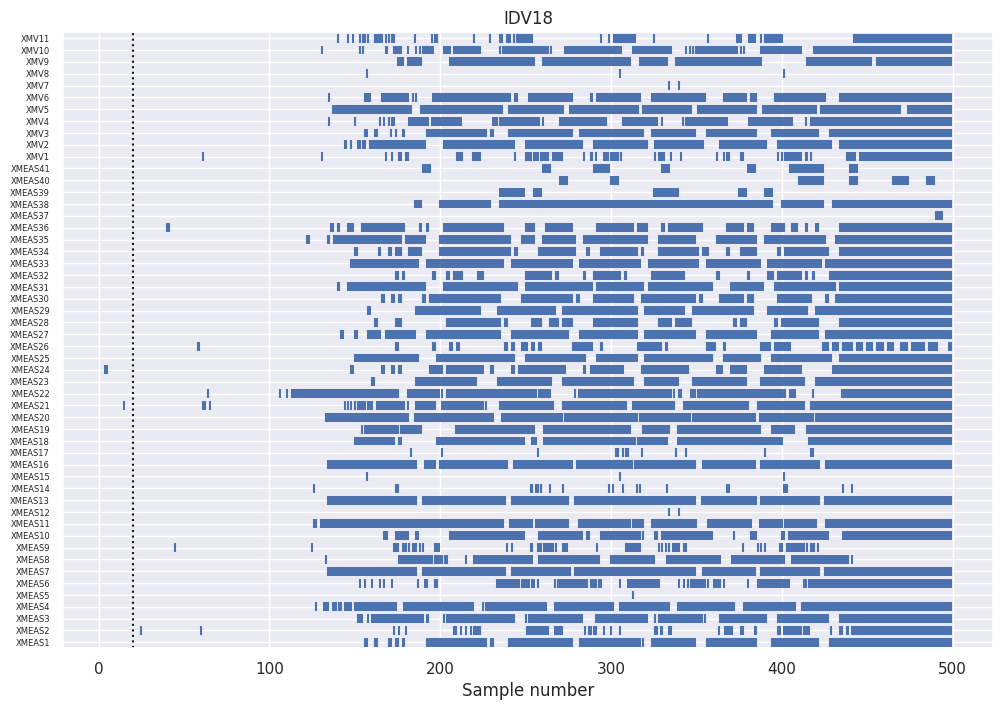

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))


for i in range(len(out_of_control)):
    ax.eventplot(out_of_control[i], color='b', lineoffsets=i+1, linelengths=0.75, linewidths=1.5, orientation='horizontal')


# Set y-axis ticks with all row labels
ax.set_yticks(np.arange(1, len(row_labels) + 1))
ax.set_yticklabels(row_labels, fontsize=6)

# Set y-axis limits to show all labels
ax.set_ylim(0.5, len(row_labels) + 0.5)
ax.set_xlabel('Sample number')
ax.set_title(f'IDV{faultnum}')
ax.axvline(20, c='k', ls='dotted')


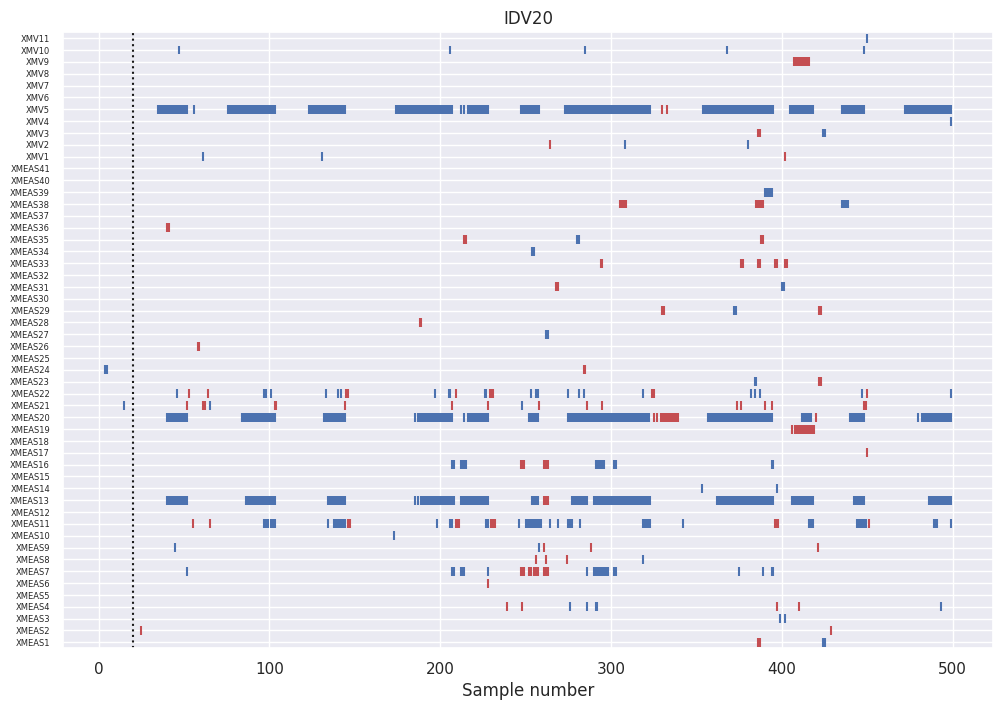

In [ ]:
# different colors

row_labels = train_df.columns.tolist()
sample_count = train_df.shape[0]
features = train_df.shape[1]

out_of_control_HIGH = []
out_of_control_LOW = []
LINE_LENGTHS = 0.75


for feature in range(features):

    temp_list = np.zeros(sample_count) # holds fault samples of this feature only
    length_list = np.zeros(sample_count) ##

    x_faultfree = train_df.iloc[:, feature]
    x_faulty = test_df.iloc[:, feature]
    mean = x_faultfree.mean()
    std = x_faultfree.std(ddof=1)
    lowerlim = mean - 3*std
    upperlim = mean + 3*std

    for sample in range(sample_count):
        if (x_faulty[sample] > upperlim):
            temp_list[sample] = 1

        elif (x_faulty[sample] < lowerlim):
            temp_list[sample] = -1

        else:
            temp_list[sample] = 0



    fault_indices_HIGH = np.where(temp_list == 1)
    fault_indices_LOW = np.where(temp_list == -1)


    out_of_control_HIGH.append(fault_indices_HIGH)
    out_of_control_LOW.append(fault_indices_LOW)


fig, ax = plt.subplots(figsize=(12, 8))


for i in range(len(out_of_control_HIGH)):
    ax.eventplot(out_of_control_HIGH[i], color='r', lineoffsets=i+1, linelengths=LINE_LENGTHS, linewidths=1.5, orientation='horizontal')

for i in range(len(out_of_control_LOW)):
    ax.eventplot(out_of_control_LOW[i], color='b', lineoffsets=i+1, linelengths=LINE_LENGTHS, linewidths=1.5, orientation='horizontal')

# Set y-axis ticks with all row labels
ax.set_yticks(np.arange(1, len(row_labels) + 1))
ax.set_yticklabels(row_labels, fontsize=6)

# Set y-axis limits to show all labels
ax.set_ylim(0.5, len(row_labels) + 0.5)
ax.set_xlabel('Sample number')
ax.set_title(f'IDV{faultnum}')
ax.axvline(20, c='k', ls='dotted')

In [ ]:

 6+   test_df_complete[(test_df_complete.simulationRun==1)]

,faultNumber,simulationRun,sample,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,1,496,0.20006,3708.5,4497.7,9.2167,27.103,42.336,2702.7,...,53.749,20.049,59.346,15.976,38.463,42.294,44.981,48.511,41.290,21.141
9996,20,1,497,0.31328,3666.5,4483.6,9.2536,26.704,42.172,2703.3,...,53.607,30.819,60.733,15.283,38.340,38.185,46.823,48.597,41.941,18.724
9997,20,1,498,0.31186,3674.1,4480.6,9.2912,26.986,42.337,2704.0,...,53.642,30.958,62.280,14.792,38.143,32.580,45.048,48.664,41.112,16.435
9998,20,1,499,0.30026,3690.1,4519.3,9.2301,26.858,42.376,2704.2,...,53.440,29.814,59.285,14.388,39.685,36.612,43.100,48.896,41.682,18.685


In [ ]:
test_df1 = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==1)].iloc[:,3:]
test_df1.reset_index(drop=True, inplace=True)
test_df1

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.74559,3647.8,4496.2,8.9127,26.599,42.246,2707.2,74.762,120.40,0.30357,...,54.033,72.805,55.919,22.553,36.582,33.413,45.081,59.867,40.954,16.382
496,0.73589,3658.5,4520.1,8.7830,26.871,42.367,2703.9,75.263,120.40,0.33425,...,53.916,72.091,56.887,22.284,40.616,37.943,42.518,59.935,41.230,17.373
497,0.73200,3651.9,4483.7,8.7352,26.919,42.468,2699.8,75.084,120.39,0.33825,...,54.353,72.473,58.412,21.659,40.128,40.946,46.667,59.835,41.161,18.255
498,0.74578,3627.7,4510.9,8.8276,26.955,42.249,2701.2,75.042,120.37,0.32027,...,54.405,72.880,59.465,22.658,37.214,37.825,47.355,59.927,40.436,19.142


In [ ]:
test_df5 = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==8)].iloc[:,3:]
test_df5.reset_index(drop=True, inplace=True)
test_df5

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV2,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.52802,3605.2,4218.5,9.5552,26.626,42.552,2657.4,71.394,120.43,0.22075,...,50.710,51.403,60.149,22.115,26.698,33.860,44.947,100.060,41.739,16.511
496,0.48896,3623.7,4264.7,9.4636,26.898,42.704,2659.1,71.863,120.43,0.24718,...,50.858,47.800,61.365,22.606,29.990,38.368,42.372,99.906,42.180,17.542
497,0.48507,3617.1,4228.2,9.4525,26.948,42.848,2659.9,71.661,120.42,0.25220,...,51.295,48.183,63.131,22.777,29.378,41.377,46.536,99.787,42.331,18.437
498,0.45147,3601.9,4281.7,9.5795,26.985,42.636,2665.8,71.610,120.40,0.22984,...,51.661,43.930,64.409,24.647,25.782,38.233,47.260,99.858,41.724,19.306


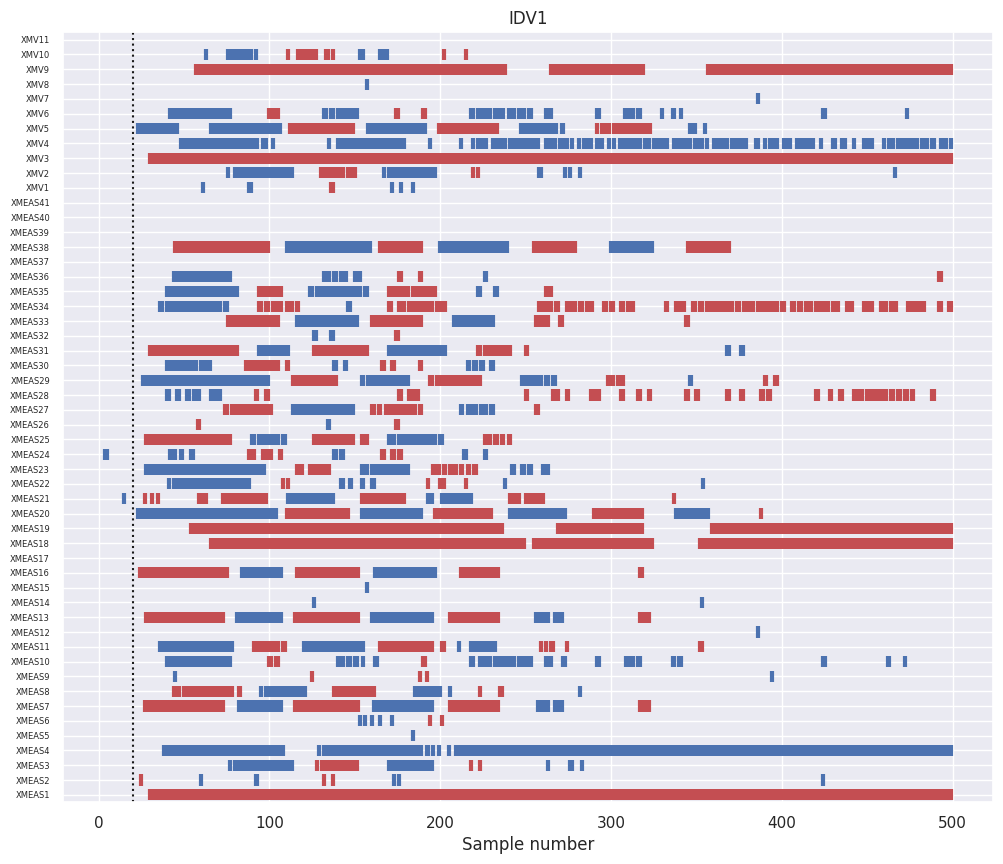

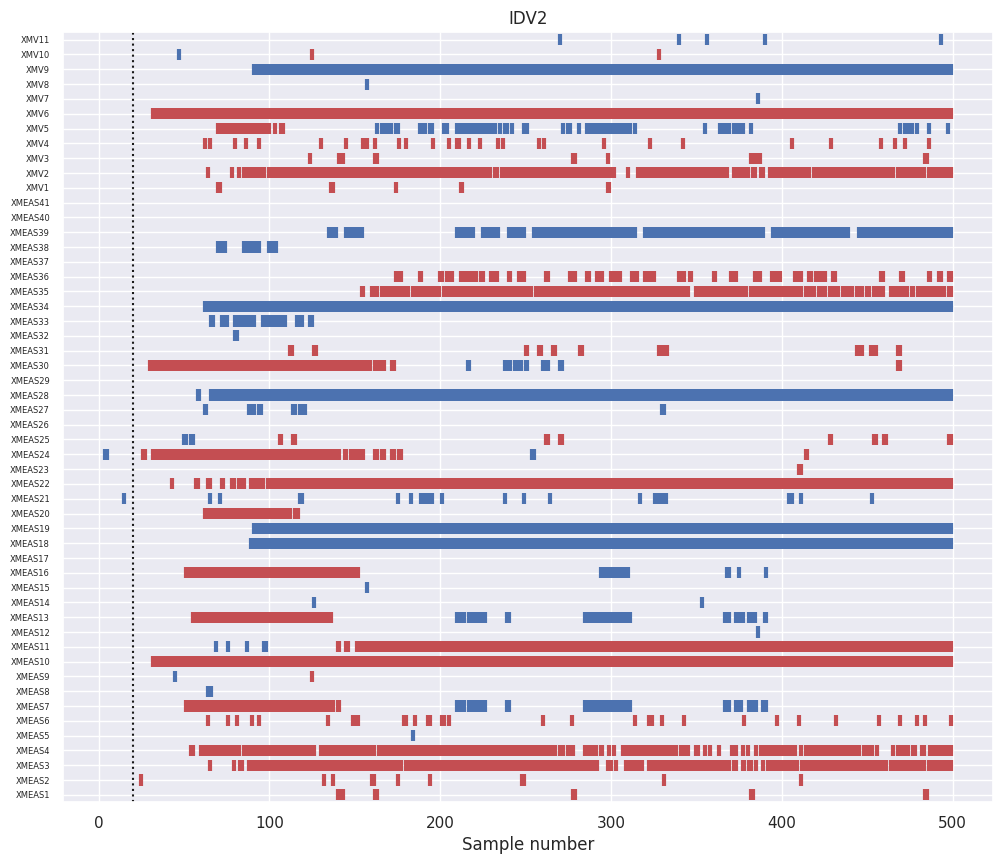

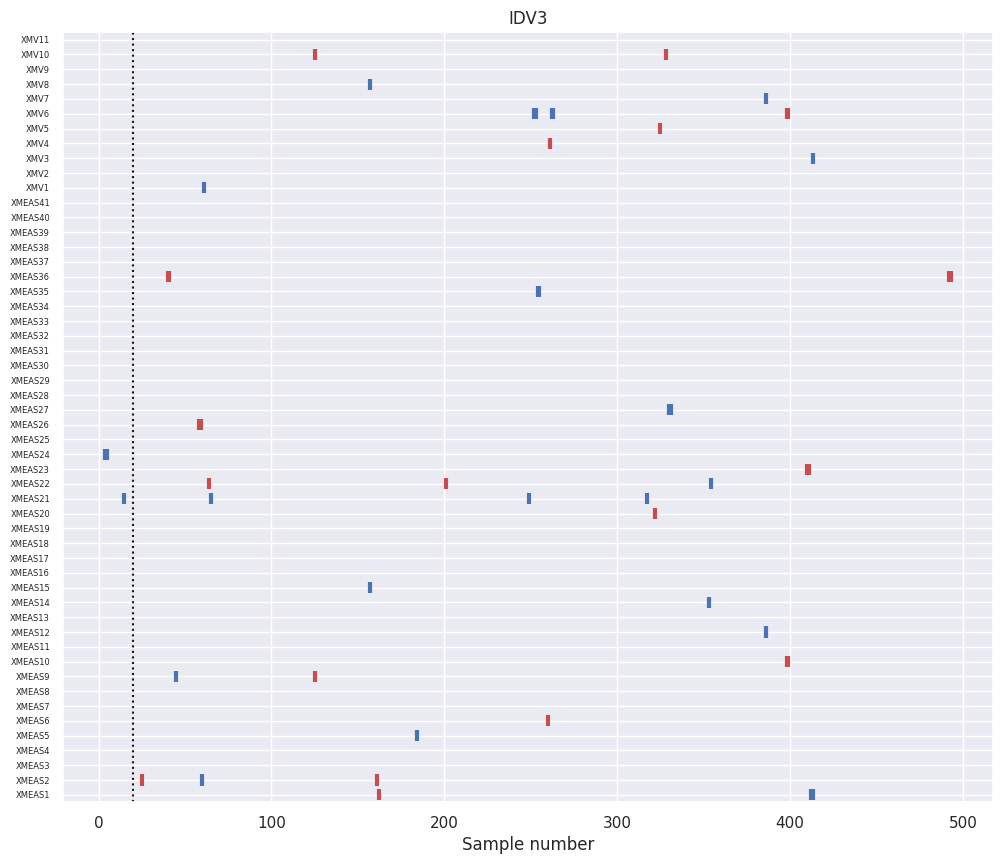

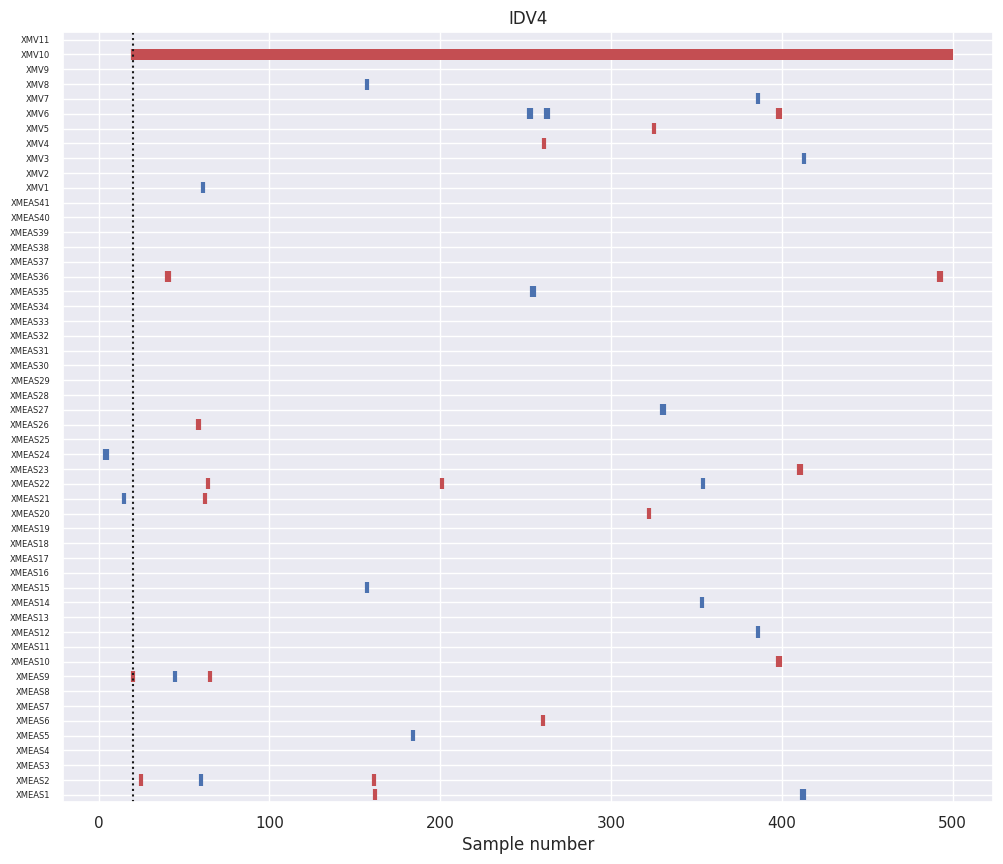

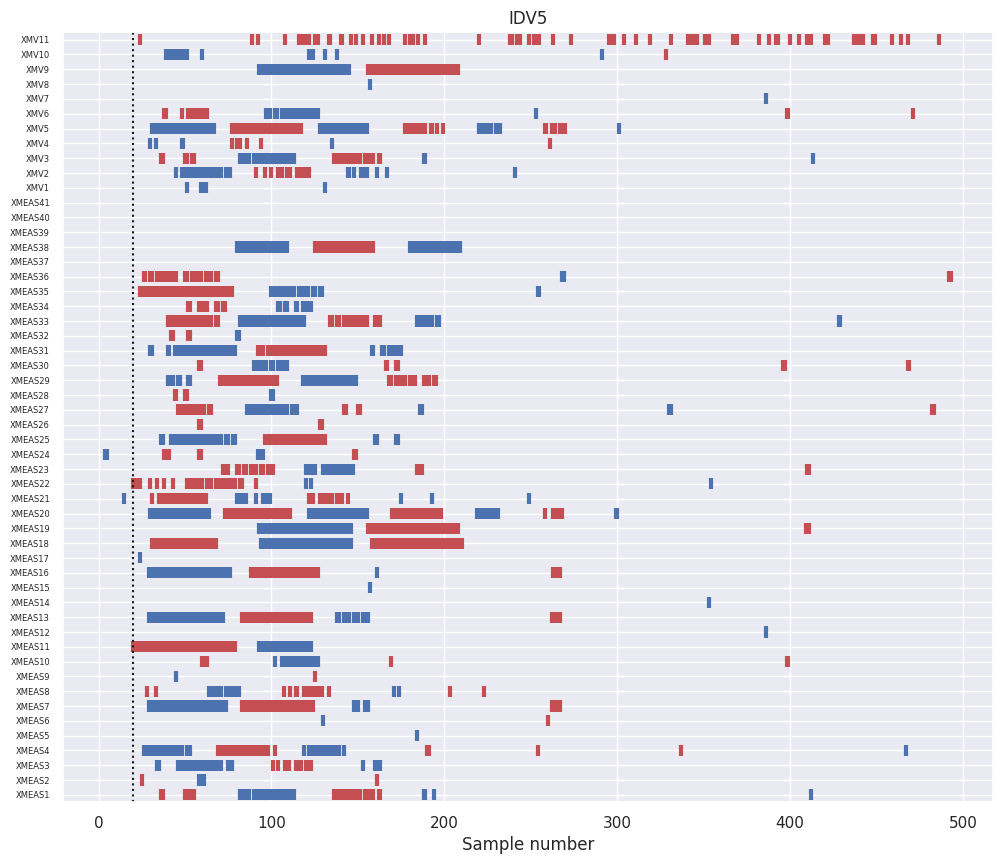

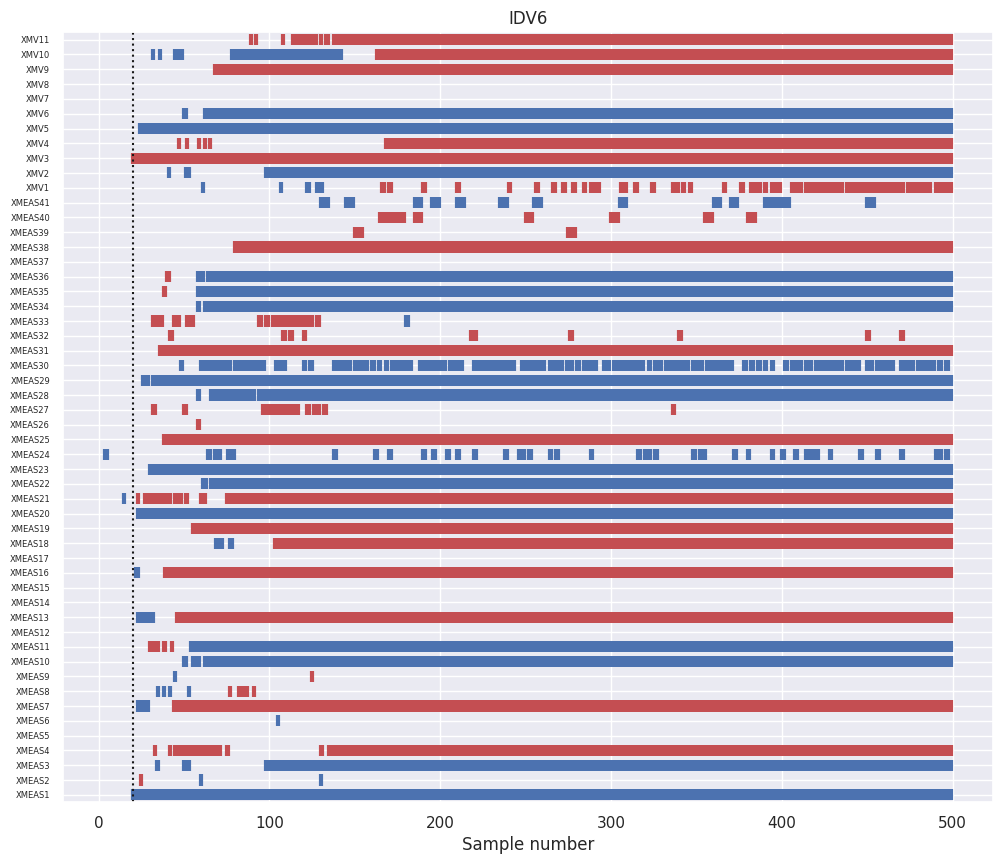

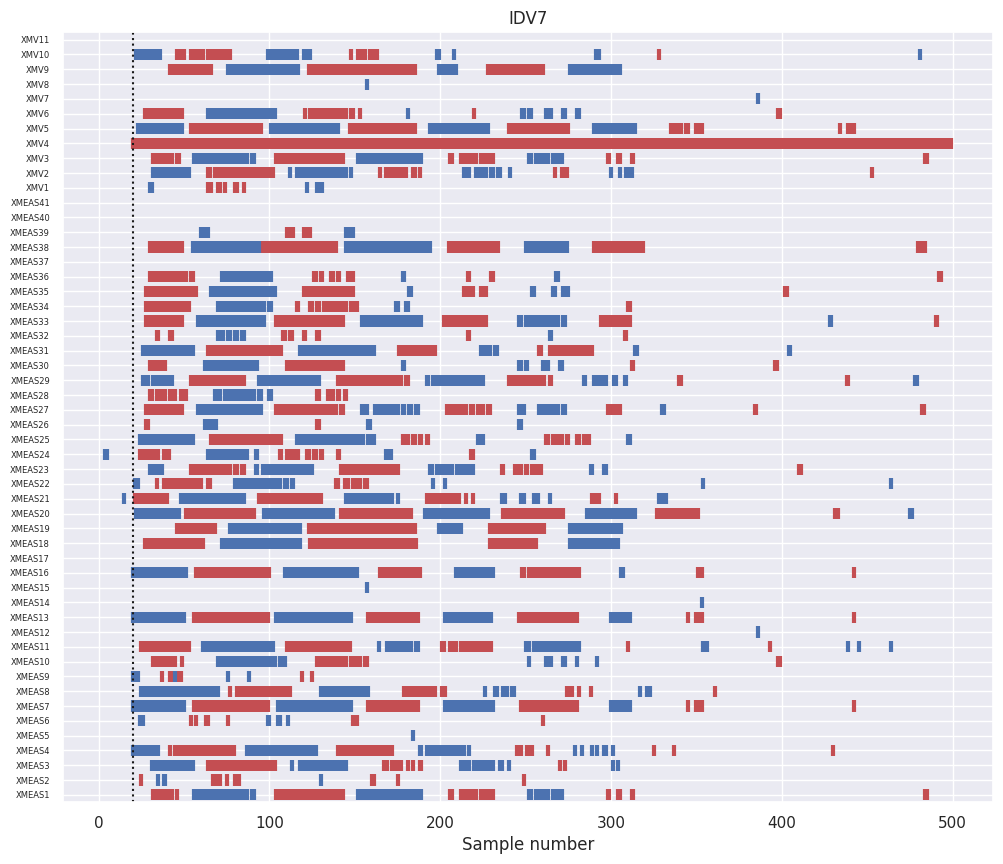

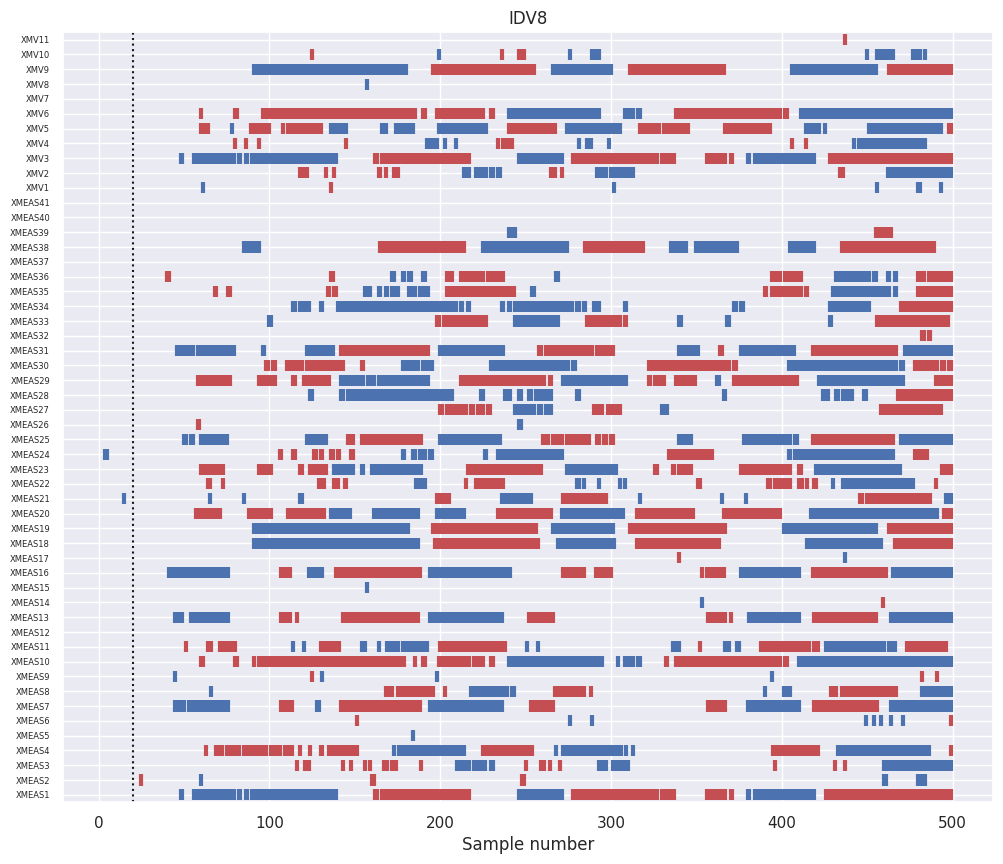

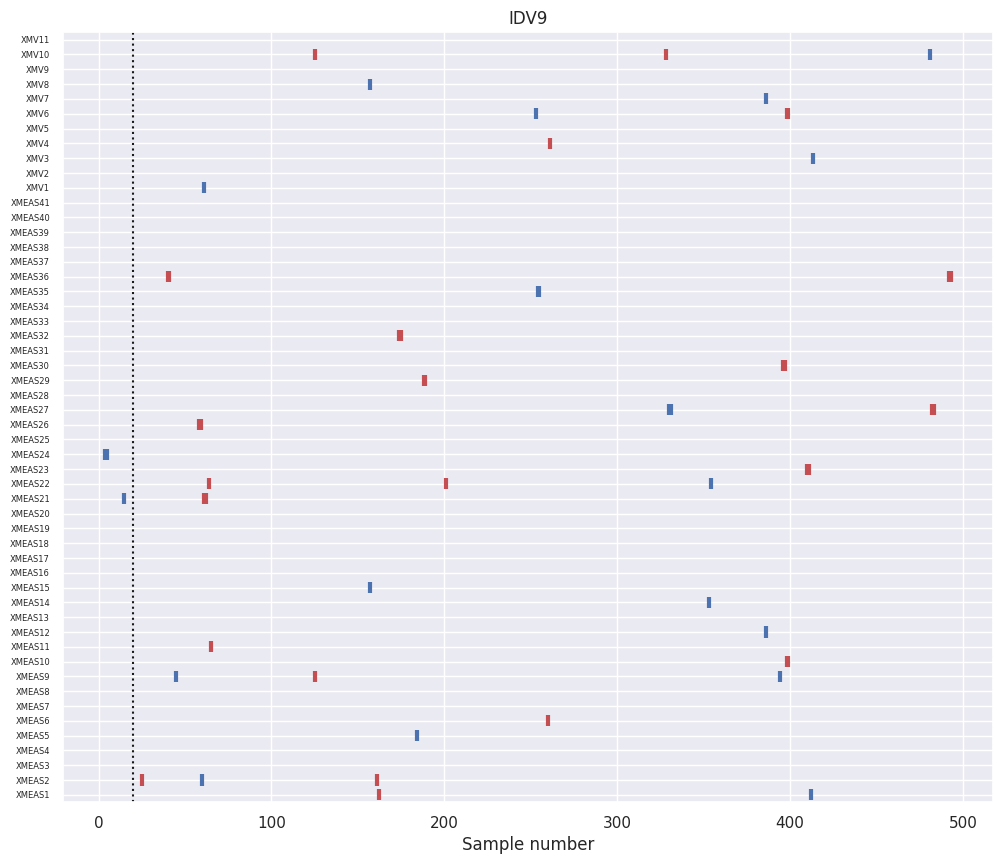

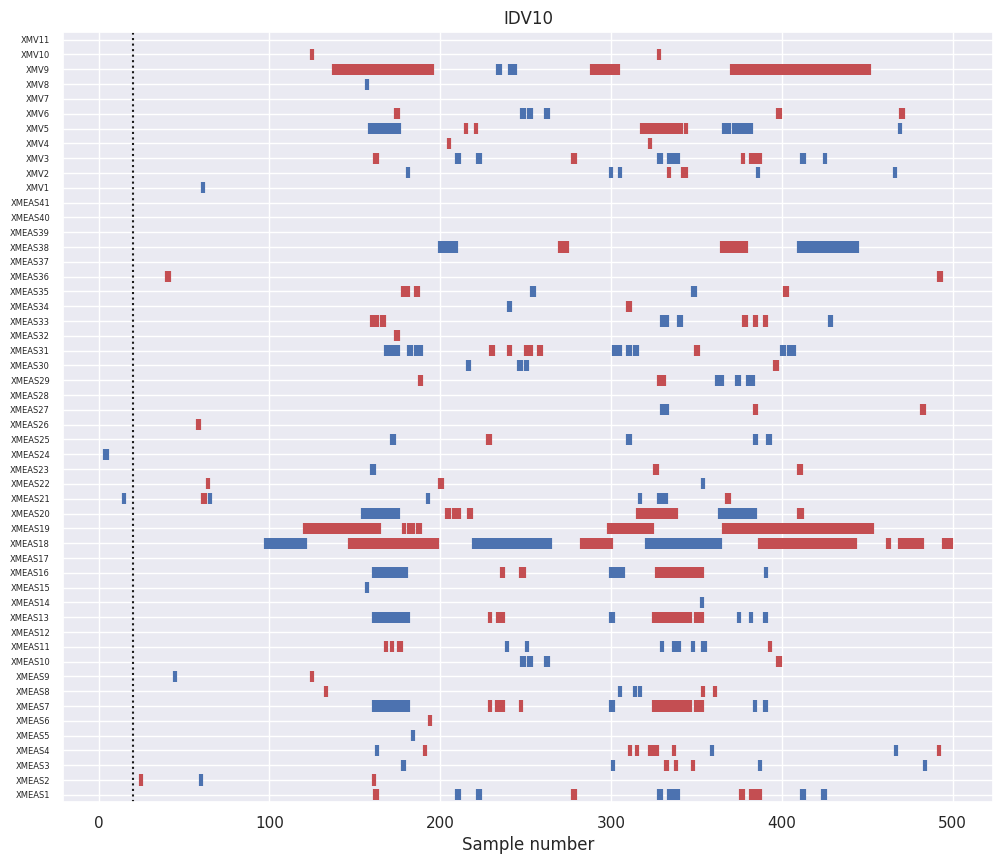

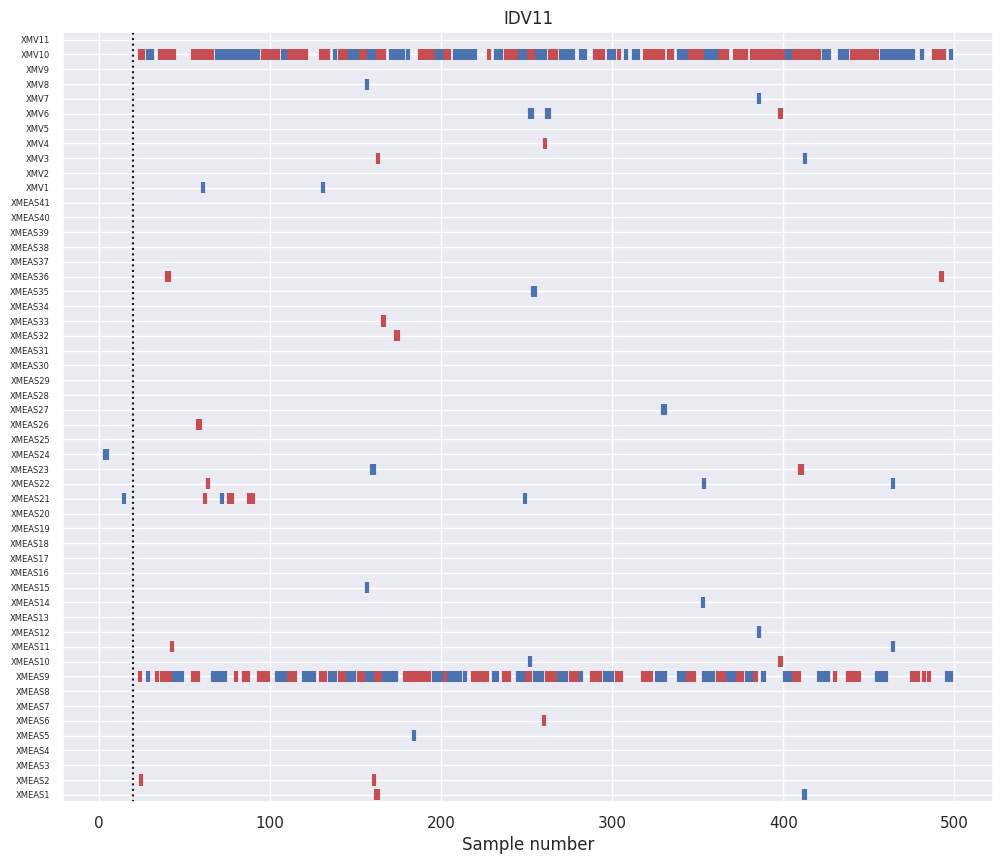

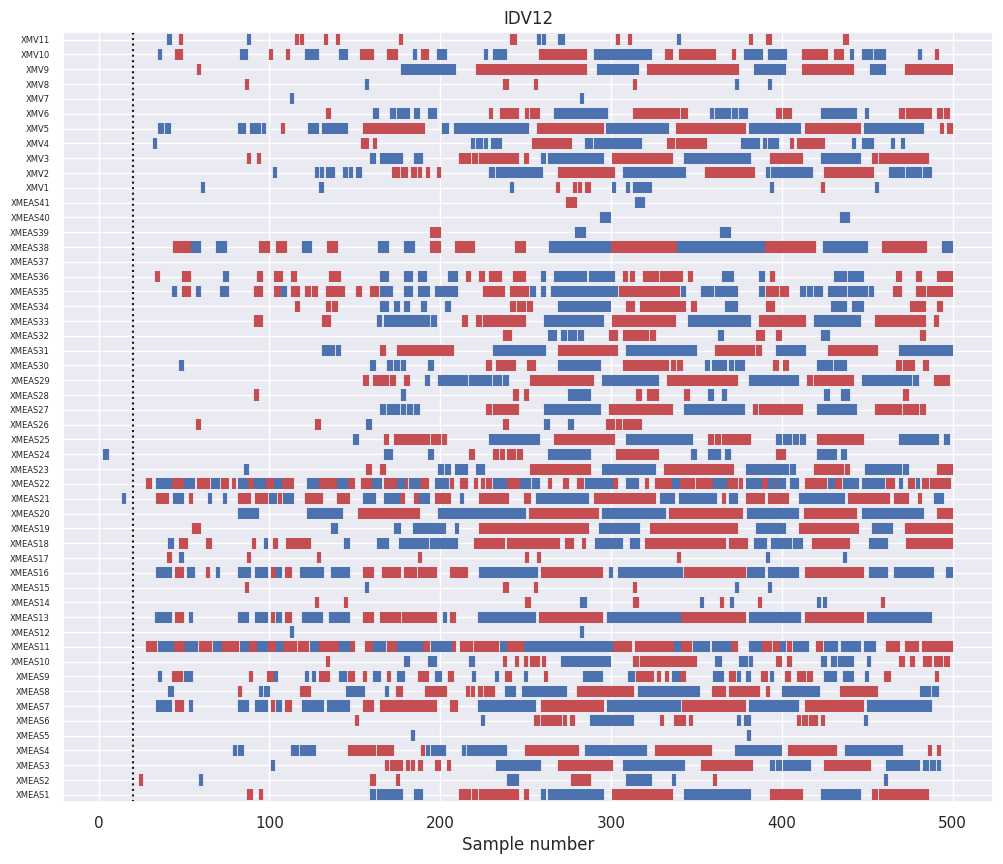

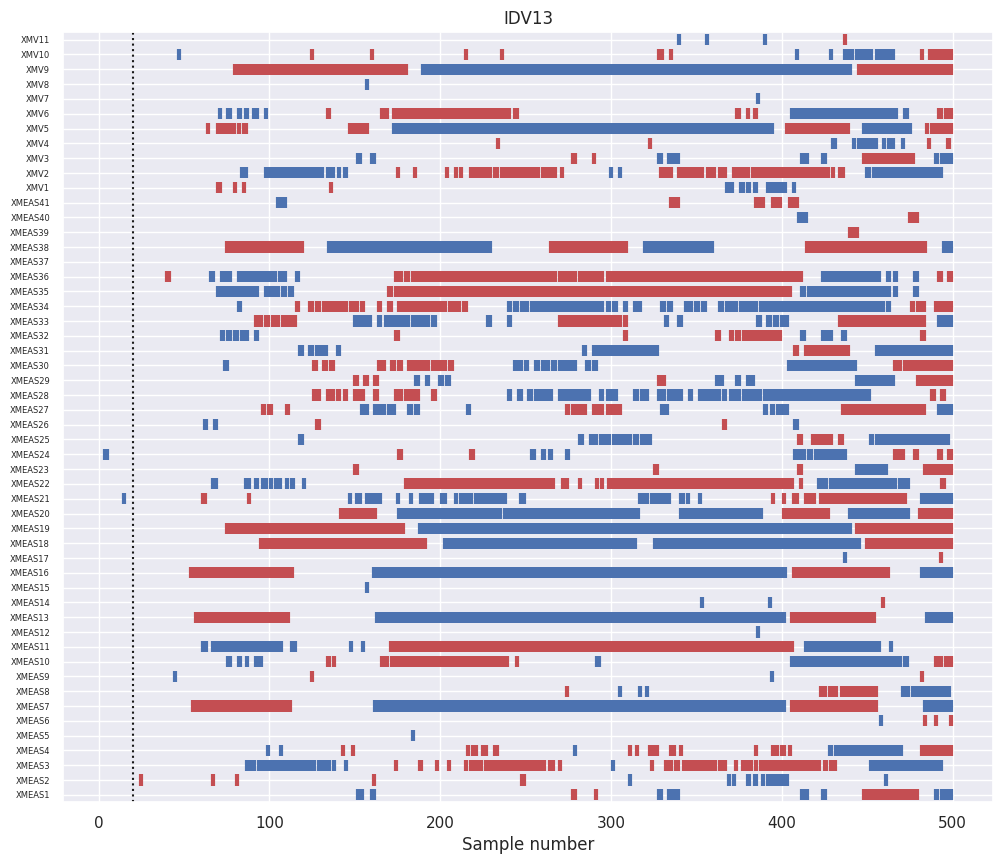

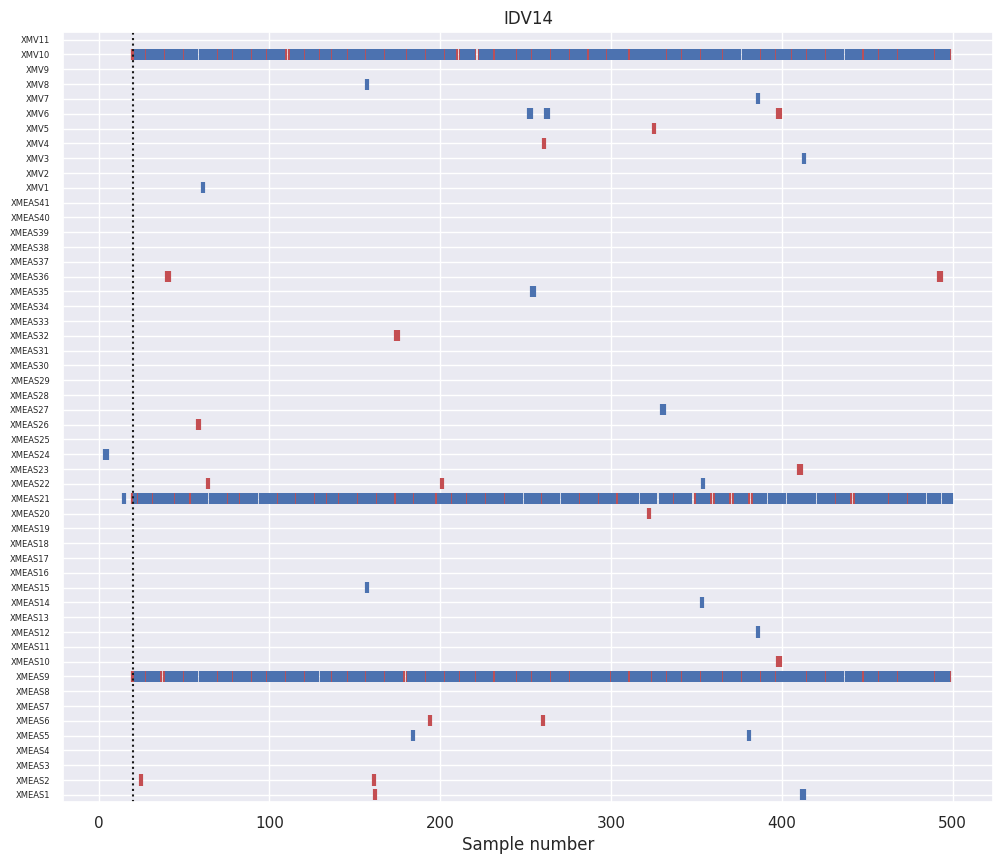

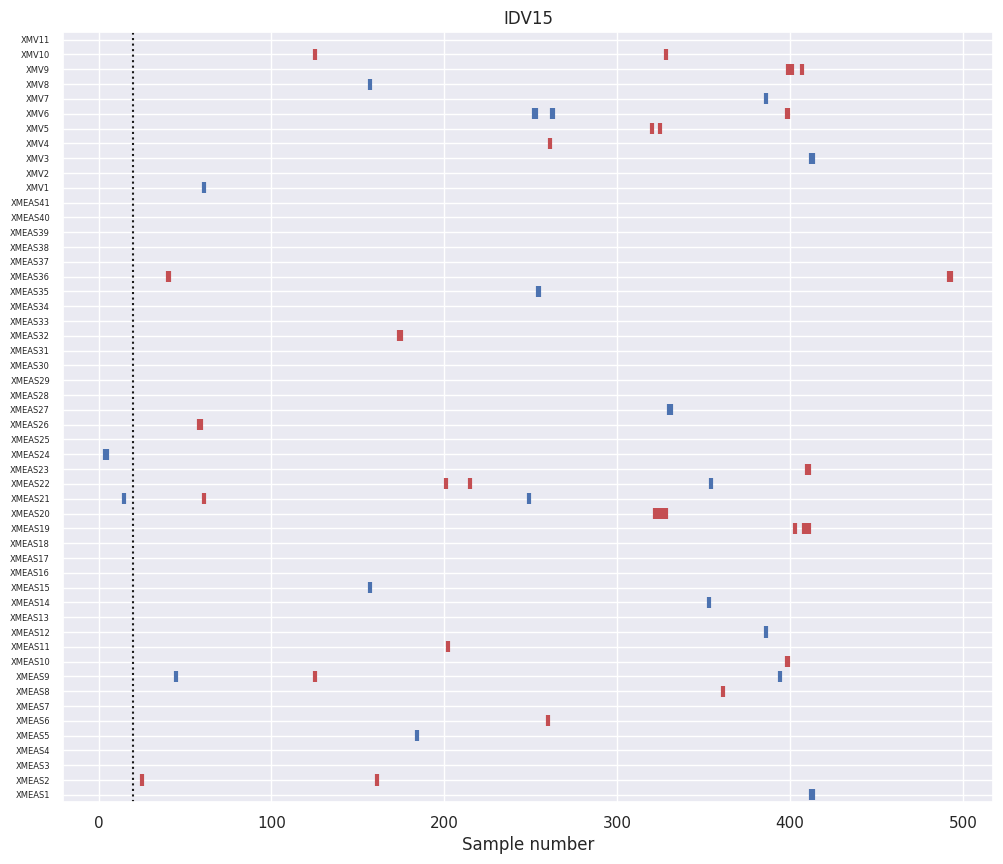

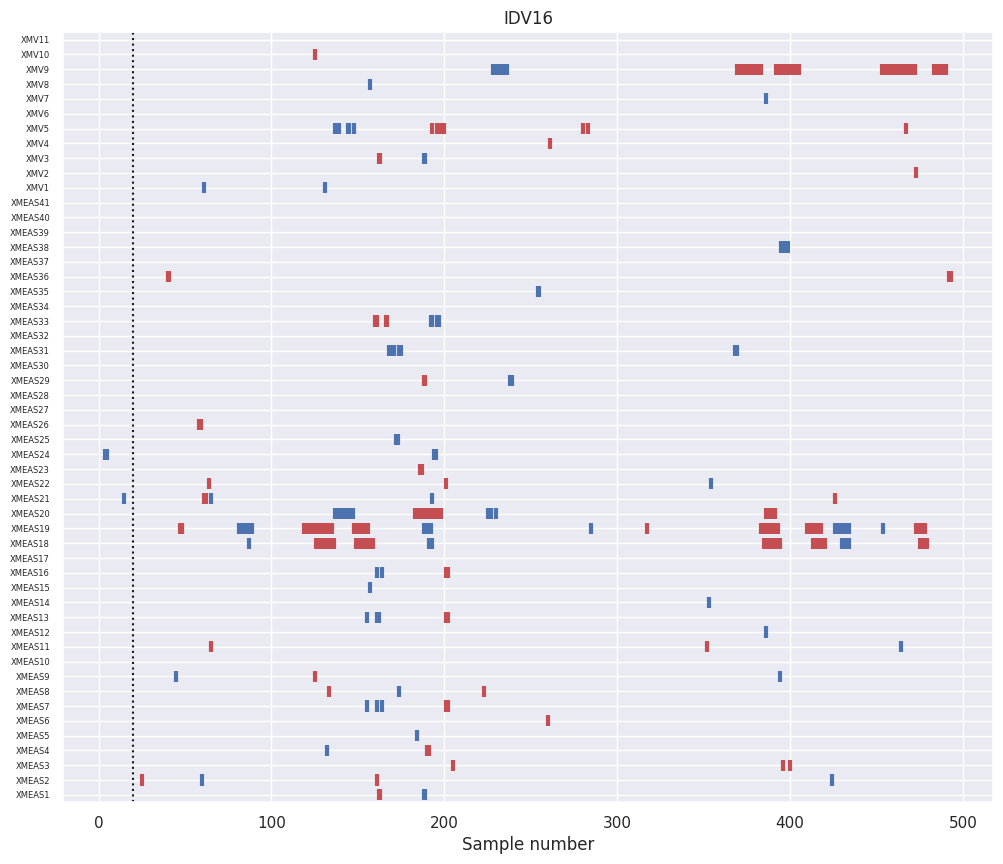

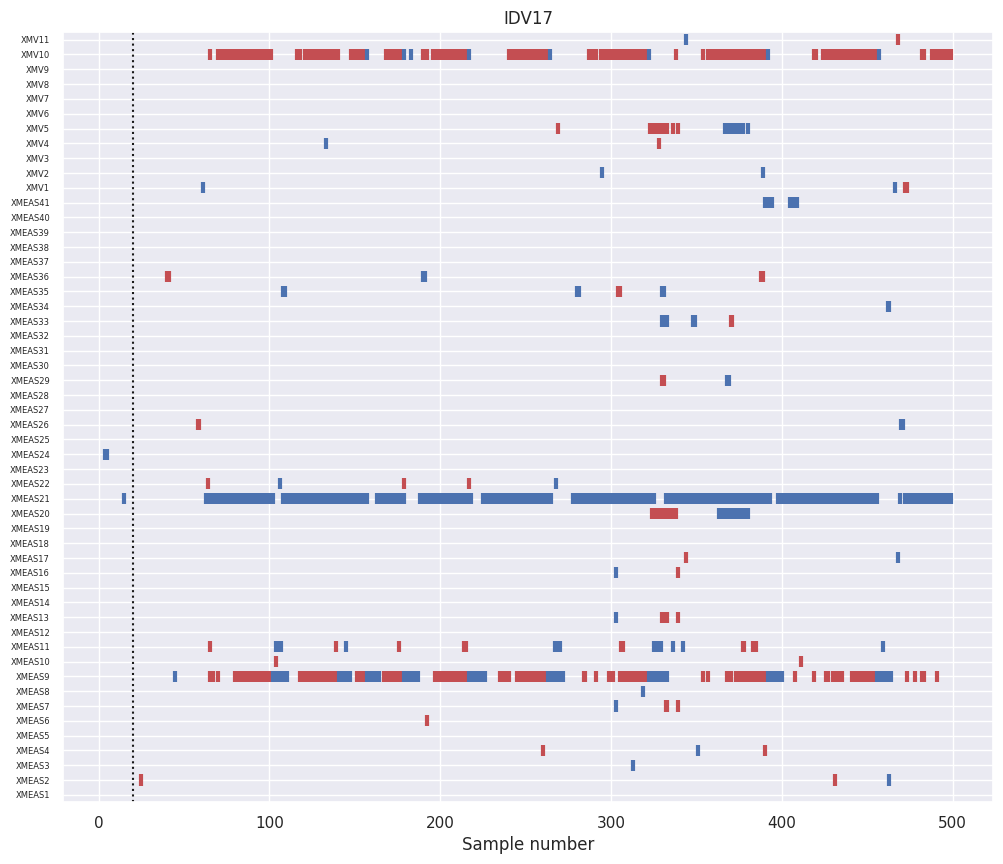

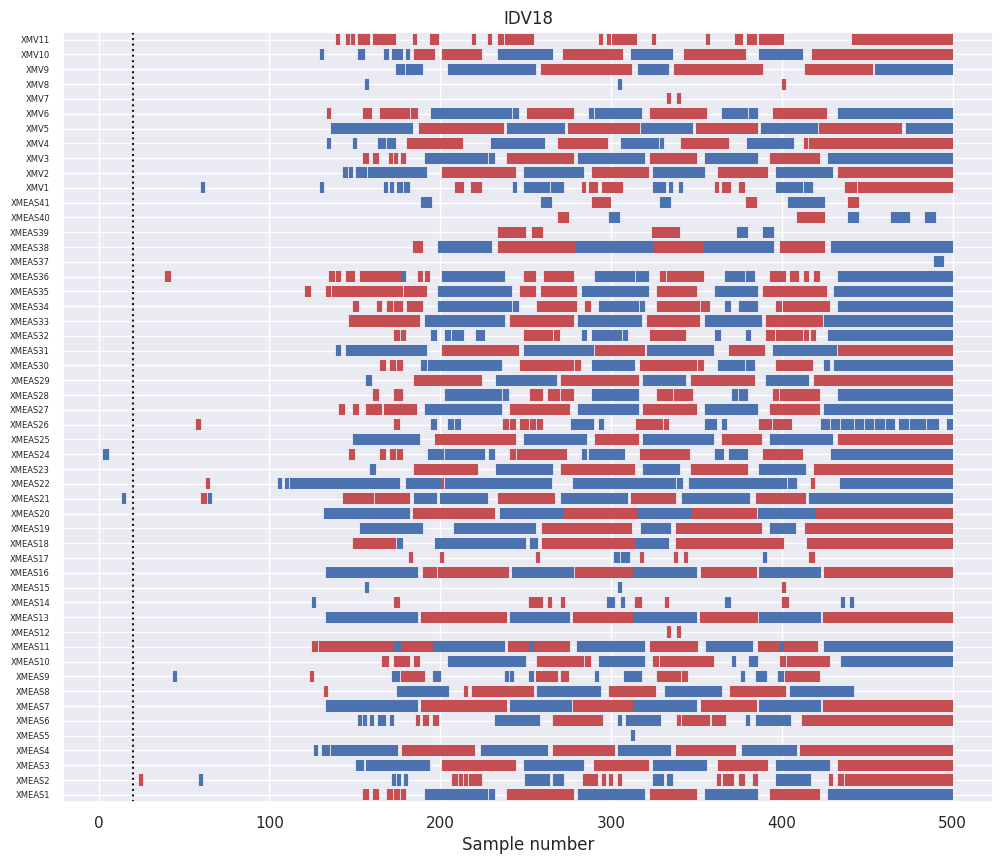

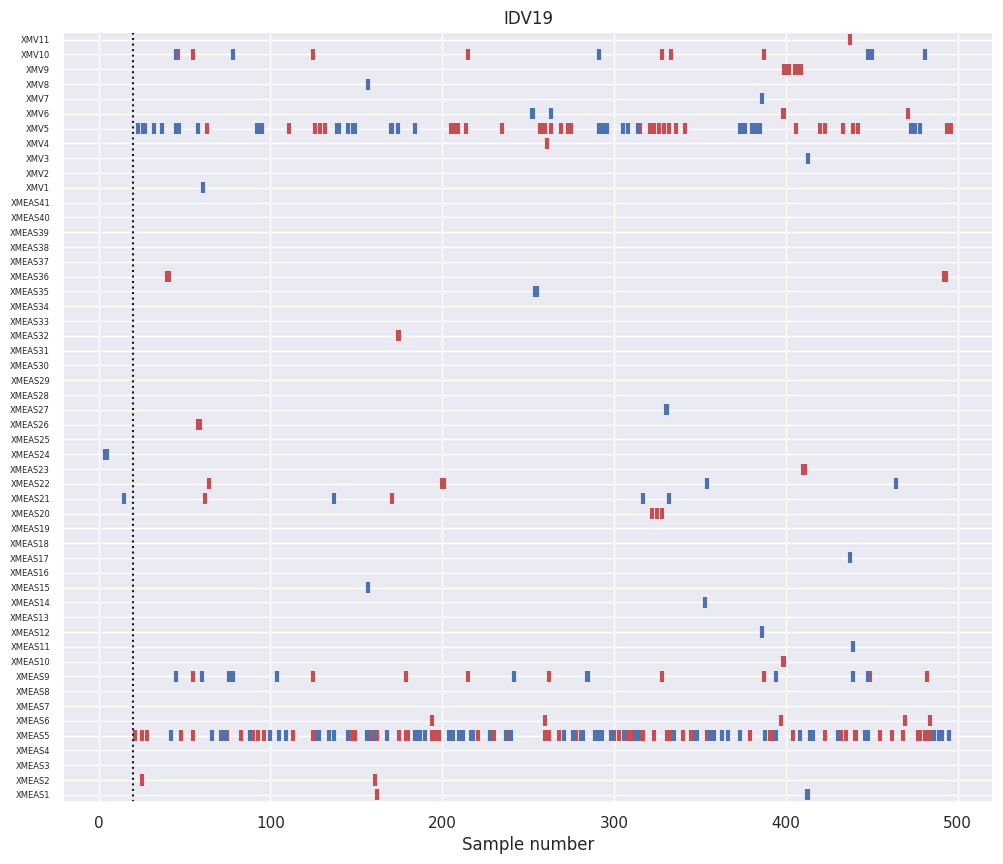

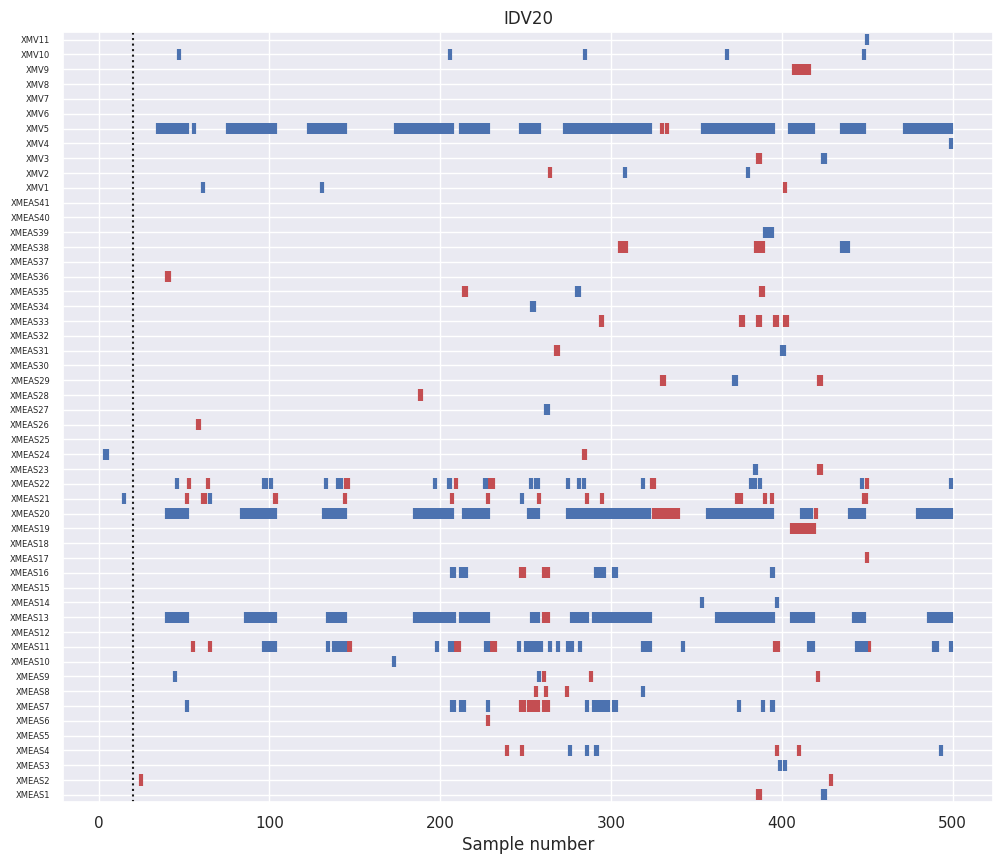

In [ ]:
# NOW THE MOMENT OF TRUTH

row_labels = train_df.columns.tolist()
sample_count = train_df.shape[0]
features = train_df.shape[1]

LINELENGTHS = 0.75
LINEWIDTHS = 3

#faultnum = 1

for faultnum in range(1,21):

    out_of_control_HIGH = []
    out_of_control_LOW = []

    test_df = test_df_complete[(test_df_complete.simulationRun==1) & (test_df_complete.faultNumber==faultnum)].iloc[:,3:]
    test_df.reset_index(drop=True, inplace=True)

    for feature in range(features):

        temp_list = np.zeros(sample_count) # holds fault samples of this feature only

        x_faultfree = train_df.iloc[:, feature]
        x_faulty = test_df.iloc[:, feature]
        mean = x_faultfree.mean()
        std = x_faultfree.std(ddof=1)
        lowerlim = mean - 3*std
        upperlim = mean + 3*std

        for sample in range(sample_count):
            if (x_faulty[sample] > upperlim):
                temp_list[sample] = 1
            elif (x_faulty[sample] < lowerlim):
                temp_list[sample] = -1
            else:
                temp_list[sample] = 0

        fault_indices_HIGH = np.where(temp_list == 1)
        fault_indices_LOW = np.where(temp_list == -1)


        out_of_control_HIGH.append(fault_indices_HIGH)
        out_of_control_LOW.append(fault_indices_LOW)

    # plot stuff
    fig, ax = plt.subplots(figsize=(12, 10))
    for i in range(len(out_of_control_HIGH)):
        ax.eventplot(out_of_control_HIGH[i], color='r', lineoffsets=i+1, linelengths=LINELENGTHS, linewidths=LINEWIDTHS, orientation='horizontal')
        ax.eventplot(out_of_control_LOW[i], color='b', lineoffsets=i+1, linelengths=LINELENGTHS, linewidths=LINEWIDTHS, orientation='horizontal')


    # Set y-axis ticks with all row labels
    ax.set_yticks(np.arange(1, len(row_labels) + 1))
    ax.set_yticklabels(row_labels, fontsize=6)

    # Set y-axis limits to show all labels
    ax.set_ylim(0.5, len(row_labels) + 0.5)
    ax.set_xlabel('Sample number')
    ax.set_title(f'IDV{faultnum}')
    ax.axvline(20, c='k', ls='dotted')

     # get rid of your arrays once the plotting is done
    del out_of_control_HIGH
    del out_of_control_LOW

In [ ]:
out_of_control

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [ ]:
len(np.zeros(500))

500

In [ ]:
feature = 3
x_faultfree = train_df.iloc[:, feature]
x_faulty = test_df.iloc[:, feature]

In [ ]:
x_faultfree[355]

9.3612

In [ ]:
test_df.head()

,A_feed_stream,D_feed_stream,E_feed_stream,Total_fresh_feed_stripper,Recycle_flow_into_rxtr,Reactor_feed_rate,Reactor_pressure,Reactor_level,Reactor_temp,Purge_rate,...,E_feed_flow_valve,A_feed_flow_valve,Total_feed_flow_stripper_valve,Compressor_recycle_valve,Purge_valve,Separator_pot_liquid_flow_valve,Stripper_liquid_product_flow_valve,Stripper_steam_valve,Reactor_cooling_water_flow_valve,Condenser_cooling_water_flow_valve
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


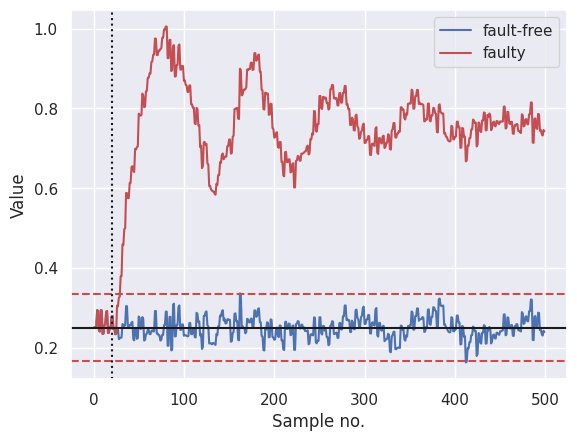

In [ ]:
good_data = train_df.iloc[:,0]
bad_data = test_df.iloc[:,0]
mean = good_data.mean()
std = good_data.std()

plt.plot(good_data, alpha=1, label='fault-free')
plt.plot(bad_data, c='r', label='faulty')
plt.axhline(y=mean, c='k')
plt.axhline(y=lowerlim, ls='--', c='r')
plt.axhline(y=upperlim, ls='--', c='r')
plt.axvline(x=20, ls='dotted', c='k')

plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.legend()



In [ ]:
class PCA:

    # here we go again

    def __init__(self, threshold=0.9):
        self.threshold = threshold
            # threshold is the desired explained variance


    def train(self, X, confidence_Q=0.99, confidence_T2=0.99, plot=True):
        # this function trains the model

        self.mu_train = X.mean(axis=0)
        self.sigma_train = X.std(axis=0)

        # standardize training data
        X = np.array(((X-self.mu_train)/self.sigma_train))

        # find the covariant matrix
        covX = np.cov(X, rowvar=False)
            # rowvar=False means that every column is a variable, and not a data point

        # find eigenvalues(L) and eigenvectors(P)
        # these are the principal component values and the principal component vectors, respectively
        self.L, self.P = np.linalg.eig(covX)

        # fractions of explained variance
        frac_expvar = self.L/np.sum(self.L)

        # cumulative fractions of explained variance
        frac_expvar_C = np.cumsum(self.L)/np.sum(self.L)

        # define number of components
        if self.threshold > 0 and self.threshold < 1:
            self.threshold = np.where(frac_expvar_C > self.threshold)[0][0] + 1
                # find the indices where threshold is greater than the cumulative fraction of explained variances
                # access the first index and add one
                # this gives the actual number of principal components required
                # why add 1? Because Python starts counting from 0, duh

                # this basically finds the smallest number of principal components required to explain the threshold fraction of variance

        # calculate detection limits for Hotelling T^2

        # use Fisher-Snedecor F distribution
        F = f.ppf(confidence_T2, self.threshold, X.shape[0] - self.threshold)
            # the PPF (Percent Point Function) tells you the value at which a certain percentage of the distribution lies to the left
        self.T2_lim = ((self.threshold*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-self.threshold)))*F
            # equation for control limit of Hotelling T^2 test

        # calculate detection limits for Q statistic
        theta = [np.sum(self.L[self.threshold:]**(i)) for i in (1, 2, 3)]
            # calculates three different sums for eigenvalues raised to the powers 1, 2 and 3
        h0 = 1 - ((2 * theta[0] * theta[2]) / (3 * (theta[1]**2)))
            # equation for control limit of Q-statistic
        n_alpha = norm.ppf(confidence_Q)
            # calculates the critical value for the normal distribution based on the confidence level
            # this is the z-score
        self.Q_lim = (theta[0]*(((n_alpha*np.sqrt(2*theta[1]*h0**2))/theta[0])+1+((theta[1]*h0*(h0-1))/theta[0]**2))**(1/h0))
            # control limit for the Q statistic's control chart

        if plot:
            fig, ax = plt.subplots()
            ax.bar(np.arange(len(frac_expvar)), frac_expvar)
            ax.plot(np.arange(len(frac_expvar)), frac_expvar_C)
            ax.axhline(y=0.9, ls='--', c='k')
            ax.axvline(x=29, ls='dotted', c=sns.color_palette()[0])
            ax.set_xlabel('Number of components')
            ax.set_ylabel('Variance of data')
            ax.set_title('PCA - Explained Variance')



    def predict(self, X):
        # for testing the model

        # standardize testing data
        # just like before
        X = np.array(((X-self.mu_train)/self.sigma_train))

        # calculate T^2 statistic again
        T = X@self.P[:,:self.threshold]
            # the @ operator does elementwise multiplication
            # selecting only the first self.threshold principal component vectors
            # T is a matrix where each row corresponds to an observation in the test data, and each column corresponds to a principal component score

        self.T2 = np.array([T[i,:]@np.linalg.inv(np.diag(self.L[:self.threshold]))@T[i,:].T for i in range(X.shape[0])])
            # calculate the T^2 statistic for each observation in the test data using the projection onto the principal components and the eigenvalues.
                # X.shape[0] is the number of observations (rows) in the test data
                # np.diag(self.L[:self.threshold]) creates a diagonal matrix using the selected eigenvalues. This matrix is used to form the denominators in the formula.
                # np.linalg.inv() calculates the inverse of the diagonal matrix. This is needed for the division in the next step.

        # calculate Q statistic
        # a similarly annoying equation indeed
        residual_error = X - X@self.P[:,:self.threshold]@self.P[:,:self.threshold].T
        self.Q = np.array([residual_error[i,:]@residual_error[i,:].T for i in range(X.shape[0])])

        # calculate the contributions of each variable in the test data to the Q statistic
        self.contributions = np.absolute(X * residual_error)

        stat_df = pd.DataFrame({
            'T2': self.T2,
            'Q': self.Q,
            #'IDV': np.nan
        })

        return stat_df

'''
    def plot_control_charts(self, fault=None):

        fig, ax = plt.subplots(1,3, figsize=(20,4))
        plt.subplots_adjust(top=0.8)

        ax[0].semilogy(self.T2, '.')
        ax[0].axhline(self.T2_lim, ls='--', c='r')
        ax[0].set_title('$T^2$ Control Chart')

        ax[1].semilogy(self.Q, '.')
        ax[1].axhline(self.Q_lim, ls='--', c='r')
        ax[1].set_title('Q Control Chart')

        # Plot Q vs T^2
        ax[2].plot(self.T2, self.Q, '.')
        ax[2].axhline(self.Q_lim, ls='--', c='r')
        ax[2].axvline(self.T2_lim, ls='--', c='r')
        ax[2].set_title('Q vs $T^2$')
        ax[2].set_xlabel('$T^2$ Value')
        ax[2].set_ylabel('Q Value')

        if fault is not None:
            ax[0].axvline(fault, c='k')
            ax[1].axvline(fault, c='k')

    def plot_contributions(self, fault=None, index=None, columns=None):
        # plots a heatmap showing what fault affects what feature

        # FAQ: Why plot the Q statistic contribution and not the T2?
        # ANS: The Q statistic focuses on deviations, while T2 is more concerned with variance.

        fig, ax = plt.subplots(figsize=(20, 6))
        contributions_df = pd.DataFrame(self.contributions, index=index, columns=columns)

        sns.heatmap(contributions_df, ax=ax, yticklabels=int(self.contributions.shape[0]/10), cmap=plt.cm.inferno) # inferno
        ax.set_title('Partial contribution to Q')


        if fault is not None:
            ax.axhline(y=contributions_df.index[fault], ls='--', c='w')

'''




"\n    def plot_control_charts(self, fault=None):\n\n        fig, ax = plt.subplots(1,3, figsize=(20,4))\n        plt.subplots_adjust(top=0.8)\n\n        ax[0].semilogy(self.T2, '.')\n        ax[0].axhline(self.T2_lim, ls='--', c='r')\n        ax[0].set_title('$T^2$ Control Chart')\n\n        ax[1].semilogy(self.Q, '.')\n        ax[1].axhline(self.Q_lim, ls='--', c='r')\n        ax[1].set_title('Q Control Chart')\n\n        # Plot Q vs T^2\n        ax[2].plot(self.T2, self.Q, '.')\n        ax[2].axhline(self.Q_lim, ls='--', c='r')\n        ax[2].axvline(self.T2_lim, ls='--', c='r')\n        ax[2].set_title('Q vs $T^2$')\n        ax[2].set_xlabel('$T^2$ Value')\n        ax[2].set_ylabel('Q Value')\n\n        if fault is not None:\n            ax[0].axvline(fault, c='k')\n            ax[1].axvline(fault, c='k')\n\n    def plot_contributions(self, fault=None, index=None, columns=None):\n        # plots a heatmap showing what fault affects what feature\n\n        # FAQ: Why plot the Q stat

In [ ]:
# redefine datasets

train_df = train_df_complete[(train_df_complete.simulationRun >= 1) & (train_df_complete.simulationRun < 5)].iloc[:,3:]

test_df = train_df_complete[(train_df_complete.simulationRun > 5) & (train_df_complete.simulationRun < 10)].iloc[:,3:]


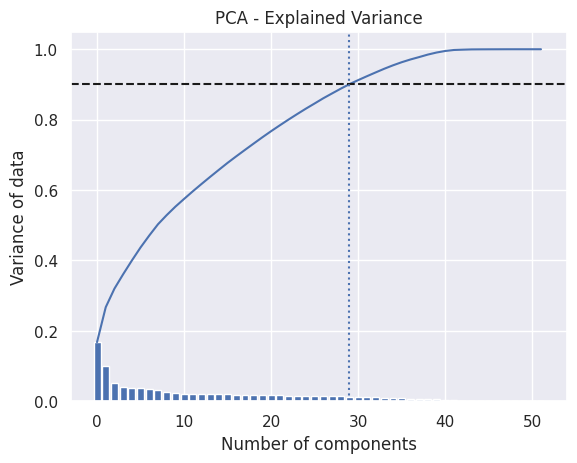

In [ ]:
pca = PCA(threshold = 0.9)
pca.train(train_df)

In [ ]:
# how many principal components did we need to cumulatively explain 90% of the variance?

pca.threshold

30

In [ ]:
# now let's test the model

pca.predict(test_df)


,T2,Q
0,6.536269,0.577255
1,11.636877,0.374486
2,17.703908,2.081278
3,19.264811,3.271601
4,26.018126,4.357529
...,...,...
495,346.292410,63.682426
496,334.013855,55.575999
497,338.840112,53.785005
498,346.260711,53.590959


In [ ]:
# false alarm rate
# points that fell above the red line even when there are no faults

print('False alarm rate\n--------------')

print(f'T2: {(pca.T2>pca.T2_lim).sum()/pca.T2.shape[0]}')
print(f'Q: {(pca.Q>pca.Q_lim).sum()/pca.Q.shape[0]}')

# we chose the condfidence level to be 99%, so we can expect around 1% false alarm

In [ ]:
faultnum = 1

test_df = test_df_complete[(test_df_complete.faultNumber==faultnum) & (test_df_complete.simulationRun==1)].iloc[:,3:]
pca.predict(test_df)



,T2,Q
0,6.536269,0.577255
1,11.636877,0.374486
2,17.703908,2.081278
3,19.264811,3.271601
4,26.018126,4.357529
...,...,...
495,346.292410,63.682426
496,334.013855,55.575999
497,338.840112,53.785005
498,346.260711,53.590959


In [ ]:
pca.T2_lim
pca.Q_lim

11.662688736949228

In [ ]:
dfs = {}
for faultnum in range(1,21):
    test_df = test_df_complete[(test_df_complete.faultNumber==faultnum) & (test_df_complete.simulationRun==1)].iloc[:,3:]
    df_name = f'df{faultnum}'
    dfs[df_name] = pca.predict(test_df)


In [ ]:
df1 = dfs['df1']
df2 = dfs['df2']
df3 = dfs['df3']
df4 = dfs['df4']
df5 = dfs['df5']
df6 = dfs['df6']
df7 = dfs['df7']
df8 = dfs['df8']
df9 = dfs['df9']
df10 = dfs['df10']
df11 = dfs['df11']
df12 = dfs['df12']
df13 = dfs['df13']
df14 = dfs['df14']
df15 = dfs['df15']
df16 = dfs['df16']
df17 = dfs['df17']
df18 = dfs['df18']
df19 = dfs['df19']
df20 = dfs['df20']

Text(0.5, 0.98, 'Q-statistic vs $T^2$-statistic plots')

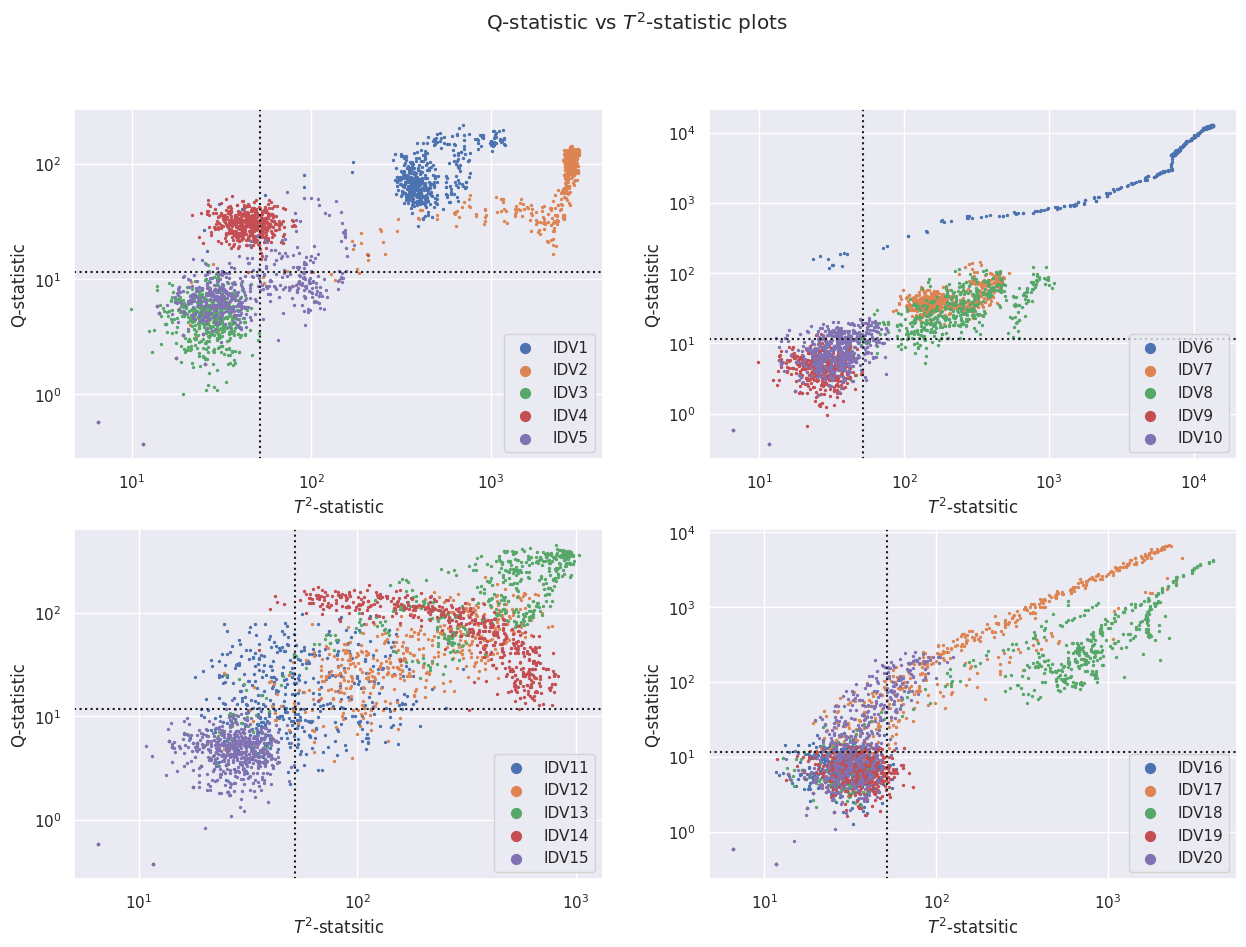

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
scatter_size = 2

#IDV1-5

axes[0,0].scatter(df1.T2, df1.Q, label='IDV1', s = scatter_size)
axes[0,0].scatter(df2.T2, df2.Q, label='IDV2', s = scatter_size)
axes[0,0].scatter(df3.T2, df3.Q, label='IDV3', s = scatter_size)
axes[0,0].scatter(df4.T2, df4.Q, label='IDV4', s = scatter_size)
axes[0,0].scatter(df5.T2, df5.Q, label='IDV5', s = scatter_size)

axes[0,0].axhline(pca.Q_lim, c='k', ls='dotted')
axes[0,0].axvline(pca.T2_lim, c='k', ls='dotted')
axes[0,0].set_xlabel('$T^2$-statistic')
axes[0,0].set_ylabel('Q-statistic')
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
axes[0,0].legend(loc='lower right', markerscale=5)

#IDV6-10

axes[0,1].scatter(df6.T2, df6.Q, label='IDV6', s = scatter_size)
axes[0,1].scatter(df7.T2, df7.Q, label='IDV7', s = scatter_size)
axes[0,1].scatter(df8.T2, df8.Q, label='IDV8', s = scatter_size)
axes[0,1].scatter(df9.T2, df9.Q, label='IDV9', s = scatter_size)
axes[0,1].scatter(df10.T2, df10.Q, label='IDV10', s = scatter_size)

axes[0,1].axhline(pca.Q_lim, c='k', ls='dotted')
axes[0,1].axvline(pca.T2_lim, c='k', ls='dotted')
axes[0,1].set_xlabel('$T^2$-statsitic')
axes[0,1].set_ylabel('Q-statistic')
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].legend(loc='lower right', markerscale=5)

#IDV11-15

axes[1,0].scatter(df11.T2, df11.Q, label='IDV11', s = scatter_size)
axes[1,0].scatter(df12.T2, df12.Q, label='IDV12', s = scatter_size)
axes[1,0].scatter(df13.T2, df13.Q, label='IDV13', s = scatter_size)
axes[1,0].scatter(df14.T2, df14.Q, label='IDV14', s = scatter_size)
axes[1,0].scatter(df15.T2, df15.Q, label='IDV15', s = scatter_size)

axes[1,0].axhline(pca.Q_lim, c='k', ls='dotted')
axes[1,0].axvline(pca.T2_lim, c='k', ls='dotted')
axes[1,0].set_xlabel('$T^2$-statsitic')
axes[1,0].set_ylabel('Q-statistic')
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].legend(loc='lower right', markerscale=5)

#IDV16-20

axes[1,1].scatter(df16.T2, df16.Q, label='IDV16', s = scatter_size)
axes[1,1].scatter(df17.T2, df17.Q, label='IDV17', s = scatter_size)
axes[1,1].scatter(df18.T2, df18.Q, label='IDV18', s = scatter_size)
axes[1,1].scatter(df19.T2, df19.Q, label='IDV19', s = scatter_size)
axes[1,1].scatter(df20.T2, df20.Q, label='IDV20', s = scatter_size)

axes[1,1].axhline(pca.Q_lim, c='k', ls='dotted')
axes[1,1].axvline(pca.T2_lim, c='k', ls='dotted')
axes[1,1].set_xlabel('$T^2$-statsitic')
axes[1,1].set_ylabel('Q-statistic')
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')
axes[1,1].legend(loc='lower right', markerscale=5)

fig.suptitle('Q-statistic vs $T^2$-statistic plots')

<ipython-input-20-a64b564d7433>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(df3.T2, df3.Q, label='IDV3', s = scatter_size, cmap='Blues')
<ipython-input-20-a64b564d7433>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(df9.T2, df9.Q, label='IDV9', s = scatter_size, cmap='Blues')
<ipython-input-20-a64b564d7433>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(df15.T2, df15.Q, label='IDV15', s = scatter_size, cmap='Blues')
<ipython-input-20-a64b564d7433>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(df19.T2, df19.Q, label='IDV19', s = scatter_size, cmap='Blues')


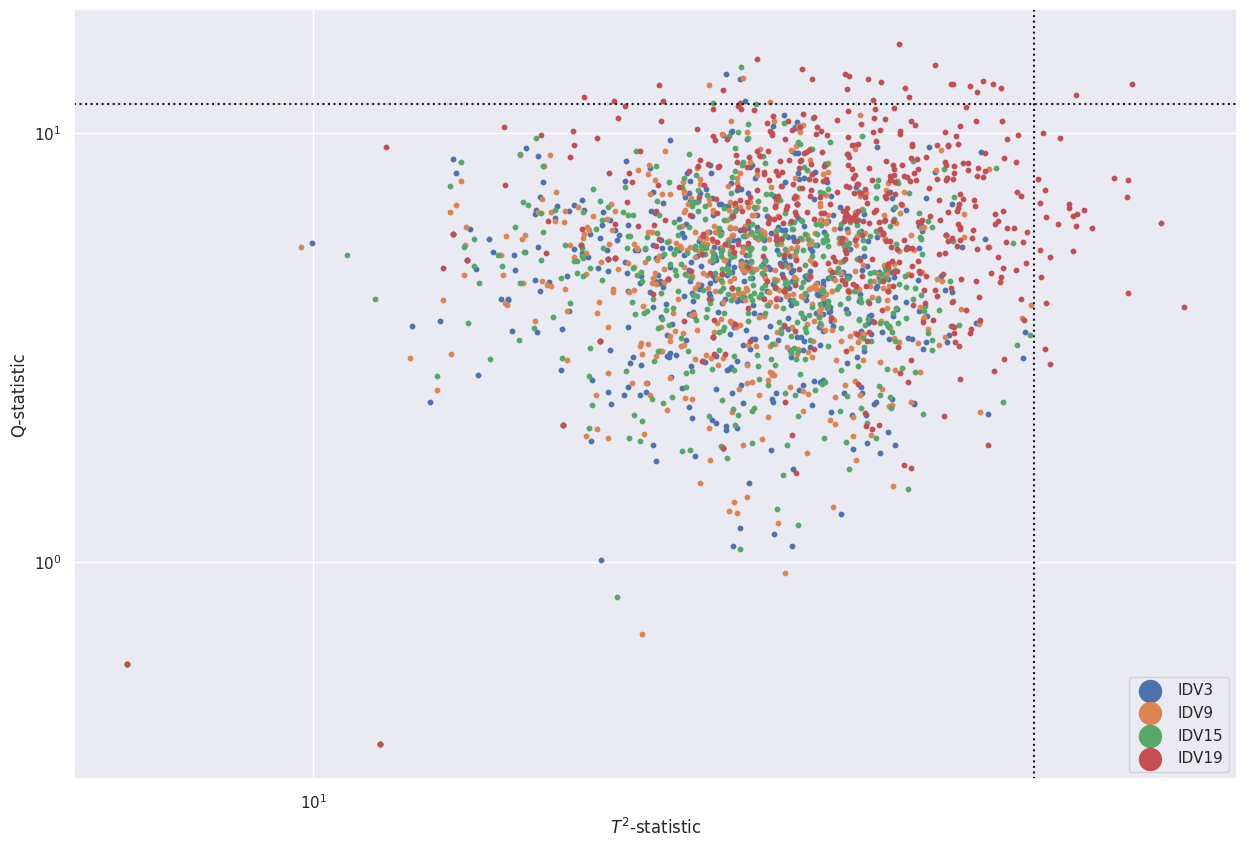

In [ ]:
# FAULTS THAT CANNOT BE DETECTED: IDV3, IDV9, IDV15, IDV19

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
scatter_size = 10
opacity = 0.5

axes.scatter(df3.T2, df3.Q, label='IDV3', s = scatter_size, cmap='Blues')
axes.scatter(df9.T2, df9.Q, label='IDV9', s = scatter_size, cmap='Blues')
axes.scatter(df15.T2, df15.Q, label='IDV15', s = scatter_size, cmap='Blues')
axes.scatter(df19.T2, df19.Q, label='IDV19', s = scatter_size, cmap='Blues')

axes.axhline(pca.Q_lim, c='k', ls='dotted')
axes.axvline(pca.T2_lim, c='k', ls='dotted')
axes.set_xlabel('$T^2$-statistic')
axes.set_ylabel('Q-statistic')
axes.set_xscale('log')
axes.set_yscale('log')
axes.legend(loc='lower right', markerscale=5)


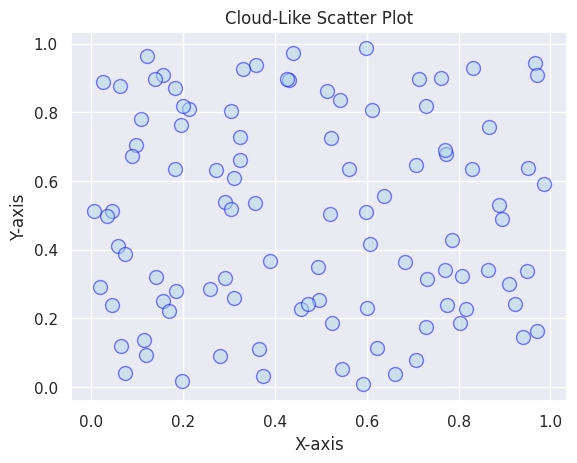

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generating random data for demonstration
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)

# Creating a scatter plot with cloud-like shading
scatter = plt.scatter(x, y, alpha=0.5, s=100, facecolors='lightblue', edgecolors='blue')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cloud-Like Scatter Plot')

# Display the plot
plt.show()
